Kütüphaneleri import ediyoruz. Dataset içerisinden verileri bir dataframe'e topluyoruz ve ilk 5 veriyi yazdırıyoruz. 

In [ ]:
import os
import pandas as pd
from glob import glob


base_dir = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset"
fish_species = os.listdir(base_dir)


data = []
for species in fish_species:
    species_dir = os.path.join(base_dir, species)
    last_folder = os.path.basename(species)

    new_path = os.path.join(base_dir, last_folder,last_folder)
    image_files3 = glob(os.path.join(new_path, '*.png'))

    for img in image_files3:
        data.append([img, species])

 

    #print(new_path)


# DataFrame oluşturma
df = pd.DataFrame(data, columns=['image_path', 'species'])
print(df.head())





dataframe'i train ve test için 0.80-0.20 olarak ayırıyoruz.

In [7]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['species'], random_state=42)


Resimleri yeniden boyutlandırıyoruz ardından normalizasyon işlemini onun da ardından one-hot encoding işlemlerini yapıyoruz.

In [8]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

IMG_SIZE = 64

def prepare_images(df, img_size):
    images = []
    labels = []
    for index, row in df.iterrows():
        img = cv2.imread(row['image_path'])
        img = cv2.resize(img, (img_size, img_size))
        images.append(img)
        labels.append(row['species'])
    
    images = np.array(images) / 255.0  # Normalizasyon
    labels = pd.get_dummies(labels).values  # One-hot encoding for species labels
    return images, labels


train_images, train_labels = prepare_images(train_df, IMG_SIZE)
test_images, test_labels = prepare_images(test_df, IMG_SIZE)




Modeli oluşturup derliyoruz.

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





Modeli eğitip performansını test ediyoruz ve grafikte test sonucunu görüyoruz.

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 50s 215ms/step - accuracy: 0.3988 - loss: 1.6295 - val_accuracy: 0.8089 - val_loss: 0.5766
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 82s 216ms/step - accuracy: 0.8136 - loss: 0.5187 - val_accuracy: 0.9372 - val_loss: 0.2256
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 48s 213ms/step - accuracy: 0.9135 - loss: 0.2637 - val_accuracy: 0.9506 - val_loss: 0.1459
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 48s 216ms/step - accuracy: 0.9561 - loss: 0.1388 - val_accuracy: 0.9622 - val_loss: 0.1158
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 48s 213ms/step - accuracy: 0.9725 - loss: 0.0916 - val_accuracy: 0.9806 - val_loss: 0.0681
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 48s 215ms/step - accuracy: 0.9756 - loss: 0.0689 - val_accuracy: 0.9656 - val_loss: 0.0997
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 82s 214ms/step - accuracy: 0.9810 - loss: 0.0622 - val_accuracy: 0.9306 - val_loss: 0.1829
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 48s 215ms/step - accuracy: 0.9729 - loss: 0

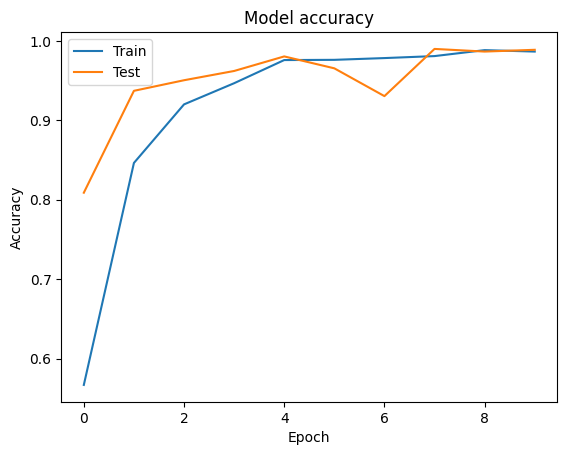

In [12]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


# Performans grafiği
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Hiper optimizasyon yaparak modelimizi tekrar eğitiyoruz.

In [15]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Eğitim işlemini başlatın
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 59s 257ms/step - accuracy: 0.2841 - loss: 1.9298 - val_accuracy: 0.6628 - val_loss: 1.0645
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 51s 227ms/step - accuracy: 0.6337 - loss: 1.0718 - val_accuracy: 0.7639 - val_loss: 0.7611
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 51s 225ms/step - accuracy: 0.7336 - loss: 0.8015 - val_accuracy: 0.8217 - val_loss: 0.5636
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 51s 226ms/step - accuracy: 0.7838 - loss: 0.6456 - val_accuracy: 0.8478 - val_loss: 0.4827
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 51s 227ms/step - accuracy: 0.8305 - loss: 0.5089 - val_accuracy: 0.8811 - val_loss: 0.3814
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 82s 227ms/step - accuracy: 0.8509 - loss: 0.4492 - val_accuracy: 0.8983 - val_loss: 0.3284
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 83s 227ms/step - accuracy: 0.8994 - loss: 0.3139 - val_accuracy: 0.9189 - val_loss: 0.2514
Epoch 9/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 52s 229ms/step - accuracy: 0.9170 - loss: 0